# Code Clause: Sentiment Analysis
Raghav Agarwal  
D.J. Sanghvi

In [44]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Data Understanding

In [13]:
df = pd.read_csv(r"C:\Users\abhay\OneDrive\Documents\CodeClause Internship\Datasets\Sentiment140\sentiment140.csv", encoding = 'latin',header=None)

In [14]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
print(df.isnull().sum())

sentiment    0
id           0
date         0
query        0
user_id      0
text         0
dtype: int64


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user_id    1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


# Data Preprocessing

## Lowercasing

In [21]:
df['text'] = df['text'].str.lower()

## Removing Links

In [22]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def remove_urls(text):
    return re.sub(url_pattern, '', text)

In [23]:
df['text'] = df['text'].apply(remove_urls)

## Removing Special Characters and Punctuation

In [24]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

## Tokenisation

In [25]:
df['tokens'] = df['text'].apply(word_tokenize)

## Removing Stopwords

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

## Stemming

In [28]:
stemmer = PorterStemmer()

In [29]:
df['stemmed_tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

## Final Dataframe After Preprocessing

In [57]:
df.head(3)

,sentiment,id,date,query,user_id,text,tokens,stemmed_tokens
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww thats a bummer you shoulda ...,"[switchfoot, awww, thats, bummer, shoulda, got...","[switchfoot, awww, that, bummer, shoulda, got,..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by t...,"[upset, cant, update, facebook, texting, might...","[upset, cant, updat, facebook, text, might, cr..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball manag...,"[kenichan, dived, many, times, ball, managed, ...","[kenichan, dive, mani, time, ball, manag, save..."


# EDA

In [32]:
sentiment_distribution = df['sentiment'].value_counts()
print(sentiment_distribution)

0    800000
4    800000
Name: sentiment, dtype: int64


In [33]:
tweet_lengths = df['text'].apply(len)
print(tweet_lengths.describe())

count    1.600000e+06
mean     6.930488e+01
std      3.466158e+01
min      3.000000e+00
25%      4.000000e+01
50%      6.400000e+01
75%      9.700000e+01
max      1.890000e+02
Name: text, dtype: float64


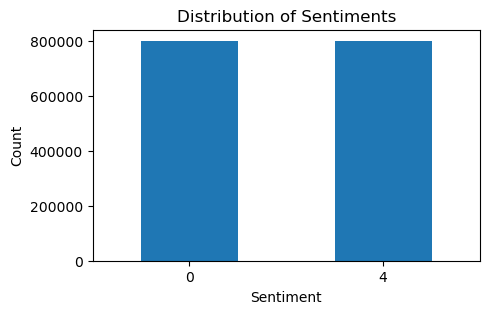

In [36]:
plt.figure(figsize=(5, 3))
sentiment_distribution.plot(kind='bar', rot=0)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments');

## Word Frequency Analysis

In [58]:
all_tokens = list(chain.from_iterable(df['stemmed_tokens']))

In [59]:
token_freq = Counter(all_tokens)

In [60]:
top_tokens = token_freq.most_common(10)

In [62]:
print("\nMost common words in stemmed tokens content:")
print(top_tokens)


Most common words in stemmed tokens content:
[('im', 177520), ('go', 137040), ('get', 109954), ('day', 101290), ('good', 90553), ('work', 85263), ('like', 82963), ('love', 81087), ('got', 70037), ('dont', 66933)]


## Word Cloud Visualization

In [63]:
all_tokens_text = ' '.join(list(chain.from_iterable(df['stemmed_tokens'])))

In [64]:
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_tokens_text)

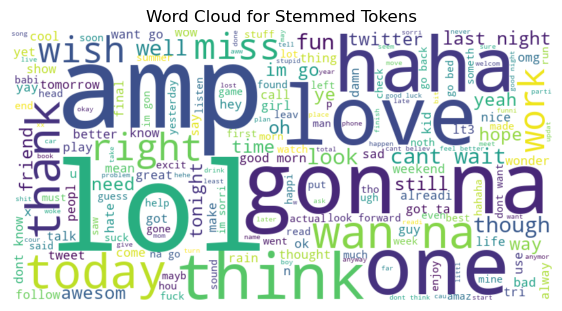

In [65]:
plt.figure(figsize=(7, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Stemmed Tokens');

# Feature Engineering (TF-IDF Vectorization)

In [67]:
all_stemmed_tokens_text = [' '.join(tokens) for tokens in df['stemmed_tokens']]

In [68]:
tfidf_vectorizer = TfidfVectorizer()

In [69]:
X_stemmed_tokens = tfidf_vectorizer.fit_transform(all_stemmed_tokens_text)

In [72]:
X_stemmed_tokens_sparse = csr_matrix(X_stemmed_tokens)

In [73]:
tfidf_columns = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_stemmed_tokens_sparse, columns=tfidf_columns)

# Model Building

## Splitting the data

In [85]:
X = tfidf_df
y = df['sentiment']

In [130]:
# Sampling as dataset is very big
num_samples = 100000

In [131]:
X_sample = X.sample(n=num_samples, random_state=42) 
y_sample = df.loc[X_sample.index]['sentiment']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

## Random Forest

In [135]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50, random_state=42)

## Logistic Regression

In [136]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Evaluation

## Random Forest

In [137]:
y_pred_rf = rf_classifier.predict(X_test)

In [138]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier: {accuracy_rf}")

Accuracy of the Random Forest Classifier: 0.75505


In [139]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      9995
           4       0.75      0.78      0.76     10005

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.75     20000
weighted avg       0.76      0.76      0.75     20000



In [140]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[7347 2648]
 [2251 7754]]


## Logistic Regression

In [141]:
y_pred_lr = logreg.predict(X_test)

In [142]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy of the Logistic Regression Classifier: {accuracy_lr}")

Accuracy of the Logistic Regression Classifier: 0.7641


In [143]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      9995
           4       0.75      0.80      0.77     10005

    accuracy                           0.76     20000
   macro avg       0.77      0.76      0.76     20000
weighted avg       0.77      0.76      0.76     20000



In [144]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[7308 2687]
 [2031 7974]]


## Comparing the Models

In [145]:
data = {
    'Models': ['Random Forest', 'Logistic Regression'],
    'Accuracies': [accuracy_rf, accuracy_lr]
}

accuracy_df = pd.DataFrame(data)

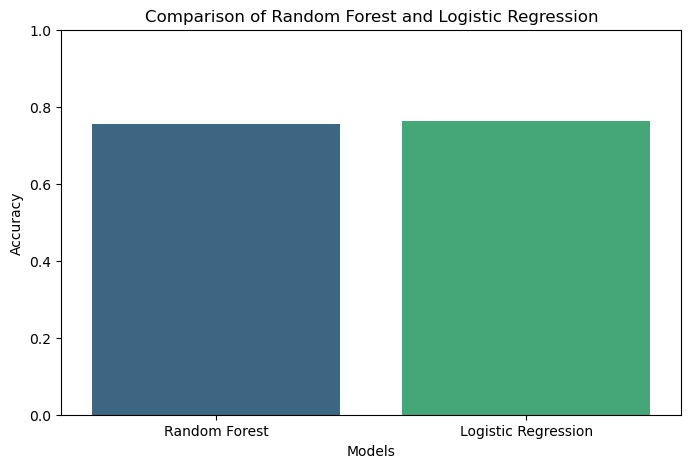

In [146]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Models', y='Accuracies', data=accuracy_df, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Random Forest and Logistic Regression')
plt.ylim(0.0, 1.0);

Our Logistic Regression model works better with a slightly higher accuracy than the Random Forest model.